# Estimating effect of multiple treatments

In [1]:
from dowhy import CausalModel
import dowhy.datasets

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = dowhy.datasets.linear_dataset(10, num_common_causes=4, num_samples=10000,
                                     num_instruments=0, num_effect_modifiers=2,
                                     num_treatments=2,
                                     treatment_is_binary=False,
                                     num_discrete_common_causes=2,
                                     num_discrete_effect_modifiers=0,
                                     one_hot_encode=False)
df=data['df']
df.head()

X0        X1        W0        W1 W2 W3         v0         v1  \
0 -0.442868 -0.044559  2.390160  0.549322  1  1   8.325582  16.475643   
1 -1.678835 -1.622912  1.329575  0.109837  3  1  11.609358  14.947020   
2 -0.469423 -3.448520 -0.885732 -0.352012  0  3  -1.648761  10.763563   
3 -1.488873 -1.891435  1.336344  1.155257  1  2   7.659028  20.774029   
4 -1.366322  0.885601 -0.527625  1.733474  2  0  11.454139   9.856779   

             y  
0   177.839159  
1 -1213.535883  
2   362.549264  
3 -1231.030429  
4   512.583411

In [3]:
model = CausalModel(data=data["df"], 
                    treatment=data["treatment_name"], outcome=data["outcome_name"], 
                    graph=data["gml_graph"])

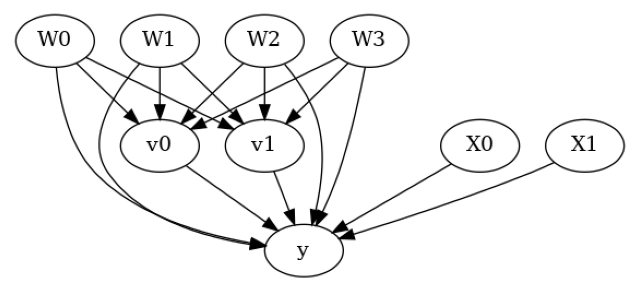

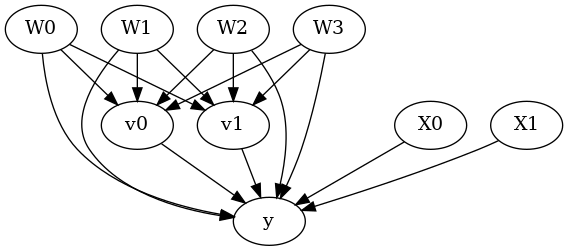

In [4]:
model.view_model()
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

In [5]:
identified_estimand= model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                      
─────────(E[y|W3,W2,W0,W1])
d[v₀  v₁]                  
Estimand assumption 1, Unconfoundedness: If U→{v0,v1} and U→y then P(y|v0,v1,W3,W2,W0,W1,U) = P(y|v0,v1,W3,W2,W0,W1)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



## Linear model

Let us first see an example for a linear model. The control_value and treatment_value can be provided as a tuple/list when the treatment is multi-dimensional.

The interpretation is change in y when v0 and v1 are changed from (0,0) to (1,1).

In [6]:
linear_estimate = model.estimate_effect(identified_estimand, 
                                        method_name="backdoor.linear_regression",
                                        control_value=(0,0),
                                        treatment_value=(1,1),
                                        method_params={'need_conditional_estimates': False})
print(linear_estimate) 

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                      
─────────(E[y|W3,W2,W0,W1])
d[v₀  v₁]                  
Estimand assumption 1, Unconfoundedness: If U→{v0,v1} and U→y then P(y|v0,v1,W3,W2,W0,W1,U) = P(y|v0,v1,W3,W2,W0,W1)

## Realized estimand
b: y~v0+v1+W3+W2+W0+W1+v0*X1+v0*X0+v1*X1+v1*X0
Target units: ate

## Estimate
Mean value: -66.92930409980858



You can estimate conditional effects, based on effect modifiers. 

In [7]:
linear_estimate = model.estimate_effect(identified_estimand, 
                                        method_name="backdoor.linear_regression",
                                        control_value=(0,0),
                                        treatment_value=(1,1))
print(linear_estimate) 

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                      
─────────(E[y|W3,W2,W0,W1])
d[v₀  v₁]                  
Estimand assumption 1, Unconfoundedness: If U→{v0,v1} and U→y then P(y|v0,v1,W3,W2,W0,W1,U) = P(y|v0,v1,W3,W2,W0,W1)

## Realized estimand
b: y~v0+v1+W3+W2+W0+W1+v0*X1+v0*X0+v1*X1+v1*X0
Target units: 

## Estimate
Mean value: -66.92930409980858
### Conditional Estimates
__categorical__X1  __categorical__X0
(-4.295, -1.49]    (-4.352, -1.313]    -199.589166
                   (-1.313, -0.736]    -183.304874
                   (-0.736, -0.219]    -178.874031
                   (-0.219, 0.373]     -170.810474
                   (0.373, 3.687]      -152.317823
(-1.49, -0.901]    (-4.352, -1.313]    -131.544658
                   (-1.313, -0.736]    -118.636120
                   (-0.736, -0.219]    -109.246527
                   (-0.219, 0.373]     -100

## More methods

You can also use methods from EconML or CausalML libraries that support multiple treatments. You can look at examples from the conditional effect notebook: https://py-why.github.io/dowhy/example_notebooks/dowhy-conditional-treatment-effects.html

Propensity-based methods do not support multiple treatments currently. 
